# Data-driven persona creation Q4 2020

In [1]:
# Remove the warnings for presentation of the notebook. During the development, the warnings were not ignored.
import warnings
warnings.filterwarnings('ignore')

First, import numpy, pandas, and datetime libraries, then read the Q4 dummy dataset.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv('Q4-all.csv')
df.head()

,Unnamed: 0,userID,companyID,country,timestamp,year,quarter,month,weekNumber,dayNumber,activity,page
0,0,34,5,Indonesia,2020-10-04 23:02:44,2020,4,10,40,4,Page,https://en.wikipedia.org/wiki/Financial_services
1,1,145,44,Turkey,2020-10-22 19:26:33,2020,4,10,43,22,Page,https://en.wikipedia.org/wiki/Financial_techno...
2,2,195,8,Turkey,2020-12-31 09:02:33,2020,4,12,53,31,Event,https://en.wikipedia.org/wiki/Bookkeeping
3,3,16,7,Turkey,2020-11-17 16:32:24,2020,4,11,47,17,Page,https://en.wikipedia.org/wiki/Main_Page
4,4,65,42,Turkey,2020-12-02 01:32:00,2020,4,12,49,2,Event,https://en.wikipedia.org/wiki/Financial_services


Then, calculate count of activity (rows) in the dataset, count of unique user and the variable names to be inserted in 'The Process' section of the dashboard.

In [3]:
activityCount = df.shape[0]
userCount = df['userID'].nunique()
variableNames = df.columns.values
variableNames = list(variableNames)

Then, transform the timestamp data into 8 different period of the day. The following are the list of time division:

|Period of day in number | Range  | Period of day  in text  |
|---:|:-------------|:-----------|
| 0.0 | 00.00 - 02.59  | Night       |
| 1.0 | 03.00 - 05.59  | Late night    |
| 2.0 | 06.00 - 08.59  | Early Morning       |
| 3.0 | 09.00 - 11.59  | Morning    |
| 4.0 | 12.00 - 14.59  | Afternoon       |
| 5.0 | 15.00 - 17.59  | Late afternoon    |
| 6.0 | 18.00 - 20.59  | Evening       |
| 7.0 | 21.00 - 23.59  | Late evening    |

In [4]:
df['userID'] = df['userID'].astype(str)
df['page'] = df['page'].astype(str)

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['visitPeriodOfDay'] = (df['timestamp'].dt.hour % 24 / 3) // 3
df.head()

,Unnamed: 0,userID,companyID,country,timestamp,year,quarter,month,weekNumber,dayNumber,activity,page,visitPeriodOfDay
0,0,34,5,Indonesia,2020-10-04 23:02:44,2020,4,10,40,4,Page,https://en.wikipedia.org/wiki/Financial_services,2.0
1,1,145,44,Turkey,2020-10-22 19:26:33,2020,4,10,43,22,Page,https://en.wikipedia.org/wiki/Financial_techno...,2.0
2,2,195,8,Turkey,2020-12-31 09:02:33,2020,4,12,53,31,Event,https://en.wikipedia.org/wiki/Bookkeeping,1.0
3,3,16,7,Turkey,2020-11-17 16:32:24,2020,4,11,47,17,Page,https://en.wikipedia.org/wiki/Main_Page,1.0
4,4,65,42,Turkey,2020-12-02 01:32:00,2020,4,12,49,2,Event,https://en.wikipedia.org/wiki/Financial_services,0.0


Further, the acitivy column is processed into dummy because the next few data transformation will be specific for user activity with the value event.

In [6]:
df = pd.get_dummies(df, columns=['activity'])
df.head()

,Unnamed: 0,userID,companyID,country,timestamp,year,quarter,month,weekNumber,dayNumber,page,visitPeriodOfDay,activity_Event,activity_Page
0,0,34,5,Indonesia,2020-10-04 23:02:44,2020,4,10,40,4,https://en.wikipedia.org/wiki/Financial_services,2.0,0,1
1,1,145,44,Turkey,2020-10-22 19:26:33,2020,4,10,43,22,https://en.wikipedia.org/wiki/Financial_techno...,2.0,0,1
2,2,195,8,Turkey,2020-12-31 09:02:33,2020,4,12,53,31,https://en.wikipedia.org/wiki/Bookkeeping,1.0,1,0
3,3,16,7,Turkey,2020-11-17 16:32:24,2020,4,11,47,17,https://en.wikipedia.org/wiki/Main_Page,1.0,0,1
4,4,65,42,Turkey,2020-12-02 01:32:00,2020,4,12,49,2,https://en.wikipedia.org/wiki/Financial_services,0.0,1,0


With mapping function, the below cell count the amount of user per company. So the userID per company was grouped then transformed into the count number of the user. Then by matching the companyID, the user count per company is pushed back to a new column in dataframe named companySize.

In [7]:
userCountPerCompany = df[['companyID', 'userID']]
userCountPerCompany['companySize'] = userCountPerCompany.groupby(by='companyID')['userID'].transform('count')
mapping = dict(userCountPerCompany[['companyID', 'companySize']].values)
df['companySize'] = df.companyID.map(mapping)
df.head()

,Unnamed: 0,userID,companyID,country,timestamp,year,quarter,month,weekNumber,dayNumber,page,visitPeriodOfDay,activity_Event,activity_Page,companySize
0,0,34,5,Indonesia,2020-10-04 23:02:44,2020,4,10,40,4,https://en.wikipedia.org/wiki/Financial_services,2.0,0,1,977
1,1,145,44,Turkey,2020-10-22 19:26:33,2020,4,10,43,22,https://en.wikipedia.org/wiki/Financial_techno...,2.0,0,1,2424
2,2,195,8,Turkey,2020-12-31 09:02:33,2020,4,12,53,31,https://en.wikipedia.org/wiki/Bookkeeping,1.0,1,0,989
3,3,16,7,Turkey,2020-11-17 16:32:24,2020,4,11,47,17,https://en.wikipedia.org/wiki/Main_Page,1.0,0,1,2419
4,4,65,42,Turkey,2020-12-02 01:32:00,2020,4,12,49,2,https://en.wikipedia.org/wiki/Financial_services,0.0,1,0,2012


Using similar method as explained above, the below cell count the visit period mode per user per visit period. Then, using user ID, the mode is pushed back to a new column in the dataframe named visitPeriodMode. Visit period mode variable represent the most often visit period (from the 8 visit period created earlier) by this user. 

In [8]:
visitPeriodMode = df[['userID', 'visitPeriodOfDay']]
visitPeriodMode1 = visitPeriodMode.groupby(['userID', 'visitPeriodOfDay']).apply(pd.DataFrame.mode).reset_index(drop=True)
mapping1 = dict(visitPeriodMode1[['userID', 'visitPeriodOfDay']].values)
df['visitPeriodMode'] = df.userID.map(mapping1)
df.head()

,Unnamed: 0,userID,companyID,country,timestamp,year,quarter,month,weekNumber,dayNumber,page,visitPeriodOfDay,activity_Event,activity_Page,companySize,visitPeriodMode
0,0,34,5,Indonesia,2020-10-04 23:02:44,2020,4,10,40,4,https://en.wikipedia.org/wiki/Financial_services,2.0,0,1,977,2.0
1,1,145,44,Turkey,2020-10-22 19:26:33,2020,4,10,43,22,https://en.wikipedia.org/wiki/Financial_techno...,2.0,0,1,2424,2.0
2,2,195,8,Turkey,2020-12-31 09:02:33,2020,4,12,53,31,https://en.wikipedia.org/wiki/Bookkeeping,1.0,1,0,989,2.0
3,3,16,7,Turkey,2020-11-17 16:32:24,2020,4,11,47,17,https://en.wikipedia.org/wiki/Main_Page,1.0,0,1,2419,2.0
4,4,65,42,Turkey,2020-12-02 01:32:00,2020,4,12,49,2,https://en.wikipedia.org/wiki/Financial_services,0.0,1,0,2012,2.0


Again, using similar method, the below cell find the task goal of the user. The task goal represents the mode of page location showed when an event activity is done by the user. Again, using user ID, the result is pushed back to a new column in the dataframe named taskGoal.
<br><br>
An event activity represent an action (thus can be called click action such as submit, download, or share. When there is no event (thus activity value is page), it means that the user only click the link to go to another page. When pushing back the result to the dataframe, the rows with activity_Page variable 1, will be assigned 'No activity detected' in the taskGoal column.

In [9]:
taskGoal = df[['userID', 'page', 'activity_Event']]
taskGoal = taskGoal[taskGoal['activity_Event'] == 1]

taskGoal['concat'] = taskGoal['userID'].str.cat(taskGoal['page'], sep='')
taskGoal['taskGoalCount'] = taskGoal.groupby(by='concat')['userID'].transform('count')
taskGoal = taskGoal.groupby('concat').max().reset_index().sort_values(by=['taskGoalCount'], ascending=False)

mapping2 = dict(taskGoal[['userID', 'page']].values)
df['taskGoal'] = df.userID.map(mapping2)
df['taskGoal'] = df['taskGoal'].fillna('No activity detected')
df.head()

,Unnamed: 0,userID,companyID,country,timestamp,year,quarter,month,weekNumber,dayNumber,page,visitPeriodOfDay,activity_Event,activity_Page,companySize,visitPeriodMode,taskGoal
0,0,34,5,Indonesia,2020-10-04 23:02:44,2020,4,10,40,4,https://en.wikipedia.org/wiki/Financial_services,2.0,0,1,977,2.0,https://en.wikipedia.org/wiki/Main_Page
1,1,145,44,Turkey,2020-10-22 19:26:33,2020,4,10,43,22,https://en.wikipedia.org/wiki/Financial_techno...,2.0,0,1,2424,2.0,https://en.wikipedia.org
2,2,195,8,Turkey,2020-12-31 09:02:33,2020,4,12,53,31,https://en.wikipedia.org/wiki/Bookkeeping,1.0,1,0,989,2.0,https://en.wikipedia.org/wiki/Financial_services
3,3,16,7,Turkey,2020-11-17 16:32:24,2020,4,11,47,17,https://en.wikipedia.org/wiki/Main_Page,1.0,0,1,2419,2.0,https://en.wikipedia.org/wiki/Main_Page
4,4,65,42,Turkey,2020-12-02 01:32:00,2020,4,12,49,2,https://en.wikipedia.org/wiki/Financial_services,0.0,1,0,2012,2.0,https://en.wikipedia.org/wiki/Financial_techno...


The below cell is to see the result of taskGoal in each unique values.

In [10]:
uniqueValues = df['taskGoal'].unique()
print(uniqueValues)

['https://en.wikipedia.org/wiki/Main_Page' 'https://en.wikipedia.org'
 'https://en.wikipedia.org/wiki/Financial_services'
 'https://en.wikipedia.org/wiki/Financial_technology'
 'https://en.wikipedia.org/wiki/Bookkeeping'
 'https://en.wikipedia.org/wiki/Accounting']


K-Means algorithm can only process the numerical values. Thus, the below cell replace the urls from taskGoal to numerical values to be processed later. In this clustering method, only the activities with events were included.

In [11]:
df['taskGoalInNumber'] = df['taskGoal'].copy()
df['taskGoalInNumber'].replace({
     'No activity detected': 0,
     'https://en.wikipedia.org': 1,
     'https://en.wikipedia.org/wiki/Financial_services' : 2,
     'https://en.wikipedia.org/wiki/Main_Page': 3,
     'https://en.wikipedia.org/wiki/Accounting': 4,
     'https://en.wikipedia.org/wiki/Bookkeeping':5, 
     'https://en.wikipedia.org/wiki/Financial_technology': 6}, inplace=True)
df.head()

,Unnamed: 0,userID,companyID,country,timestamp,year,quarter,month,weekNumber,dayNumber,page,visitPeriodOfDay,activity_Event,activity_Page,companySize,visitPeriodMode,taskGoal,taskGoalInNumber
0,0,34,5,Indonesia,2020-10-04 23:02:44,2020,4,10,40,4,https://en.wikipedia.org/wiki/Financial_services,2.0,0,1,977,2.0,https://en.wikipedia.org/wiki/Main_Page,3
1,1,145,44,Turkey,2020-10-22 19:26:33,2020,4,10,43,22,https://en.wikipedia.org/wiki/Financial_techno...,2.0,0,1,2424,2.0,https://en.wikipedia.org,1
2,2,195,8,Turkey,2020-12-31 09:02:33,2020,4,12,53,31,https://en.wikipedia.org/wiki/Bookkeeping,1.0,1,0,989,2.0,https://en.wikipedia.org/wiki/Financial_services,2
3,3,16,7,Turkey,2020-11-17 16:32:24,2020,4,11,47,17,https://en.wikipedia.org/wiki/Main_Page,1.0,0,1,2419,2.0,https://en.wikipedia.org/wiki/Main_Page,3
4,4,65,42,Turkey,2020-12-02 01:32:00,2020,4,12,49,2,https://en.wikipedia.org/wiki/Financial_services,0.0,1,0,2012,2.0,https://en.wikipedia.org/wiki/Financial_techno...,6


In [12]:
df = df[df['taskGoalInNumber'] != 0]
df.head()

,Unnamed: 0,userID,companyID,country,timestamp,year,quarter,month,weekNumber,dayNumber,page,visitPeriodOfDay,activity_Event,activity_Page,companySize,visitPeriodMode,taskGoal,taskGoalInNumber
0,0,34,5,Indonesia,2020-10-04 23:02:44,2020,4,10,40,4,https://en.wikipedia.org/wiki/Financial_services,2.0,0,1,977,2.0,https://en.wikipedia.org/wiki/Main_Page,3
1,1,145,44,Turkey,2020-10-22 19:26:33,2020,4,10,43,22,https://en.wikipedia.org/wiki/Financial_techno...,2.0,0,1,2424,2.0,https://en.wikipedia.org,1
2,2,195,8,Turkey,2020-12-31 09:02:33,2020,4,12,53,31,https://en.wikipedia.org/wiki/Bookkeeping,1.0,1,0,989,2.0,https://en.wikipedia.org/wiki/Financial_services,2
3,3,16,7,Turkey,2020-11-17 16:32:24,2020,4,11,47,17,https://en.wikipedia.org/wiki/Main_Page,1.0,0,1,2419,2.0,https://en.wikipedia.org/wiki/Main_Page,3
4,4,65,42,Turkey,2020-12-02 01:32:00,2020,4,12,49,2,https://en.wikipedia.org/wiki/Financial_services,0.0,1,0,2012,2.0,https://en.wikipedia.org/wiki/Financial_techno...,6


Next, the below line added variable weekOfYear from the timestamp variable.

In [13]:
df['weekOfYear'] = df.timestamp.dt.strftime('%U')
df.head()

,Unnamed: 0,userID,companyID,country,timestamp,year,quarter,month,weekNumber,dayNumber,page,visitPeriodOfDay,activity_Event,activity_Page,companySize,visitPeriodMode,taskGoal,taskGoalInNumber,weekOfYear
0,0,34,5,Indonesia,2020-10-04 23:02:44,2020,4,10,40,4,https://en.wikipedia.org/wiki/Financial_services,2.0,0,1,977,2.0,https://en.wikipedia.org/wiki/Main_Page,3,40
1,1,145,44,Turkey,2020-10-22 19:26:33,2020,4,10,43,22,https://en.wikipedia.org/wiki/Financial_techno...,2.0,0,1,2424,2.0,https://en.wikipedia.org,1,42
2,2,195,8,Turkey,2020-12-31 09:02:33,2020,4,12,53,31,https://en.wikipedia.org/wiki/Bookkeeping,1.0,1,0,989,2.0,https://en.wikipedia.org/wiki/Financial_services,2,52
3,3,16,7,Turkey,2020-11-17 16:32:24,2020,4,11,47,17,https://en.wikipedia.org/wiki/Main_Page,1.0,0,1,2419,2.0,https://en.wikipedia.org/wiki/Main_Page,3,46
4,4,65,42,Turkey,2020-12-02 01:32:00,2020,4,12,49,2,https://en.wikipedia.org/wiki/Financial_services,0.0,1,0,2012,2.0,https://en.wikipedia.org/wiki/Financial_techno...,6,48


Using similar method to find taskGoal variable, mostVisitedPage created to highlight the one page the users visited the most, to be compared with the taskGoal

In [14]:
mostVisitedPage = df[['userID', 'page', 'activity_Event']]

mostVisitedPage['concat'] = mostVisitedPage['userID'].str.cat(mostVisitedPage['page'], sep='')
mostVisitedPage['mostVisitedPageCount'] = mostVisitedPage.groupby(by='concat')['userID'].transform('count')
mostVisitedPage = mostVisitedPage.groupby('concat').max().reset_index().sort_values(by=['mostVisitedPageCount'], ascending=False)

mapping3 = dict(mostVisitedPage[['userID', 'page']].values)
df['mostVisitedPage'] = df.userID.map(mapping3)
df['mostVisitedPage'] = df['mostVisitedPage'].fillna('No activity detected')
df.head()

,Unnamed: 0,userID,companyID,country,timestamp,year,quarter,month,weekNumber,dayNumber,page,visitPeriodOfDay,activity_Event,activity_Page,companySize,visitPeriodMode,taskGoal,taskGoalInNumber,weekOfYear,mostVisitedPage
0,0,34,5,Indonesia,2020-10-04 23:02:44,2020,4,10,40,4,https://en.wikipedia.org/wiki/Financial_services,2.0,0,1,977,2.0,https://en.wikipedia.org/wiki/Main_Page,3,40,https://en.wikipedia.org/wiki/Main_Page
1,1,145,44,Turkey,2020-10-22 19:26:33,2020,4,10,43,22,https://en.wikipedia.org/wiki/Financial_techno...,2.0,0,1,2424,2.0,https://en.wikipedia.org,1,42,https://en.wikipedia.org
2,2,195,8,Turkey,2020-12-31 09:02:33,2020,4,12,53,31,https://en.wikipedia.org/wiki/Bookkeeping,1.0,1,0,989,2.0,https://en.wikipedia.org/wiki/Financial_services,2,52,https://en.wikipedia.org
3,3,16,7,Turkey,2020-11-17 16:32:24,2020,4,11,47,17,https://en.wikipedia.org/wiki/Main_Page,1.0,0,1,2419,2.0,https://en.wikipedia.org/wiki/Main_Page,3,46,https://en.wikipedia.org/wiki/Bookkeeping
4,4,65,42,Turkey,2020-12-02 01:32:00,2020,4,12,49,2,https://en.wikipedia.org/wiki/Financial_services,0.0,1,0,2012,2.0,https://en.wikipedia.org/wiki/Financial_techno...,6,48,https://en.wikipedia.org


Again, the mostVisitedPageCount is a column used to prepare mostVisitedPage variable to be processed into persona clusters.

In [15]:
df['mostVisitedPageCount'] = df['mostVisitedPage'].copy()
df['mostVisitedPageCount'].replace({
     'No activity detected': 0,
     'https://en.wikipedia.org': 1,
     'https://en.wikipedia.org/wiki/Financial_services' : 2,
     'https://en.wikipedia.org/wiki/Main_Page': 3,
     'https://en.wikipedia.org/wiki/Accounting': 4,
     'https://en.wikipedia.org/wiki/Bookkeeping':5, 
     'https://en.wikipedia.org/wiki/Financial_technology': 6}, inplace=True)
df.head()

,Unnamed: 0,userID,companyID,country,timestamp,year,quarter,month,weekNumber,dayNumber,...,visitPeriodOfDay,activity_Event,activity_Page,companySize,visitPeriodMode,taskGoal,taskGoalInNumber,weekOfYear,mostVisitedPage,mostVisitedPageCount
0,0,34,5,Indonesia,2020-10-04 23:02:44,2020,4,10,40,4,...,2.0,0,1,977,2.0,https://en.wikipedia.org/wiki/Main_Page,3,40,https://en.wikipedia.org/wiki/Main_Page,3
1,1,145,44,Turkey,2020-10-22 19:26:33,2020,4,10,43,22,...,2.0,0,1,2424,2.0,https://en.wikipedia.org,1,42,https://en.wikipedia.org,1
2,2,195,8,Turkey,2020-12-31 09:02:33,2020,4,12,53,31,...,1.0,1,0,989,2.0,https://en.wikipedia.org/wiki/Financial_services,2,52,https://en.wikipedia.org,1
3,3,16,7,Turkey,2020-11-17 16:32:24,2020,4,11,47,17,...,1.0,0,1,2419,2.0,https://en.wikipedia.org/wiki/Main_Page,3,46,https://en.wikipedia.org/wiki/Bookkeeping,5
4,4,65,42,Turkey,2020-12-02 01:32:00,2020,4,12,49,2,...,0.0,1,0,2012,2.0,https://en.wikipedia.org/wiki/Financial_techno...,6,48,https://en.wikipedia.org,1


Using groupby, transform and mapping function, visitPerDayMode variable was created to find the mode of visit count of every user.

In [16]:
visitCountPerDay = df[['userID', 'page', 'mostVisitedPageCount']]
visitPerDayMode = visitCountPerDay.groupby(['userID', 'mostVisitedPageCount']).apply(pd.DataFrame.mode).reset_index(drop=True)
mapping4 = dict(visitCountPerDay[['userID', 'mostVisitedPageCount']].values)
df['visitPerDayMode'] = df.userID.map(mapping4)
df.head()

,Unnamed: 0,userID,companyID,country,timestamp,year,quarter,month,weekNumber,dayNumber,...,activity_Event,activity_Page,companySize,visitPeriodMode,taskGoal,taskGoalInNumber,weekOfYear,mostVisitedPage,mostVisitedPageCount,visitPerDayMode
0,0,34,5,Indonesia,2020-10-04 23:02:44,2020,4,10,40,4,...,0,1,977,2.0,https://en.wikipedia.org/wiki/Main_Page,3,40,https://en.wikipedia.org/wiki/Main_Page,3,3
1,1,145,44,Turkey,2020-10-22 19:26:33,2020,4,10,43,22,...,0,1,2424,2.0,https://en.wikipedia.org,1,42,https://en.wikipedia.org,1,1
2,2,195,8,Turkey,2020-12-31 09:02:33,2020,4,12,53,31,...,1,0,989,2.0,https://en.wikipedia.org/wiki/Financial_services,2,52,https://en.wikipedia.org,1,1
3,3,16,7,Turkey,2020-11-17 16:32:24,2020,4,11,47,17,...,0,1,2419,2.0,https://en.wikipedia.org/wiki/Main_Page,3,46,https://en.wikipedia.org/wiki/Bookkeeping,5,5
4,4,65,42,Turkey,2020-12-02 01:32:00,2020,4,12,49,2,...,1,0,2012,2.0,https://en.wikipedia.org/wiki/Financial_techno...,6,48,https://en.wikipedia.org,1,1


The persona creation for this iteration use the mode number of user activity. Thus, the dataframe will now be subseted to only have variables to be clustered and the duplicates will be removed.

In [17]:
df1 = df[['userID', 'companySize', 'visitPeriodMode', 'taskGoalInNumber', 'weekOfYear', 'mostVisitedPageCount', 'visitPerDayMode']]
df1 = pd.DataFrame.drop_duplicates(df1, subset='userID', keep='last')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 98955 to 99999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userID                201 non-null    object 
 1   companySize           201 non-null    int64  
 2   visitPeriodMode       201 non-null    float64
 3   taskGoalInNumber      201 non-null    int64  
 4   weekOfYear            201 non-null    object 
 5   mostVisitedPageCount  201 non-null    int64  
 6   visitPerDayMode       201 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 12.6+ KB


The cell below create the list of variables used in the persona creation process and will be shown on 'The Process' section

In [18]:
variableTransformedNames = df1.columns.values
variableTransformedNames = list(variableTransformedNames)

In [19]:
df1['userID'] = df1['userID'].astype(int)
df1['visitPeriodMode'] = df1['visitPeriodMode'].astype(int)
df1['weekOfYear'] = df1['weekOfYear'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 98955 to 99999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   userID                201 non-null    int64
 1   companySize           201 non-null    int64
 2   visitPeriodMode       201 non-null    int64
 3   taskGoalInNumber      201 non-null    int64
 4   weekOfYear            201 non-null    int64
 5   mostVisitedPageCount  201 non-null    int64
 6   visitPerDayMode       201 non-null    int64
dtypes: int64(7)
memory usage: 12.6 KB


The dataset is then fitted into kmean model and the The Elbow Method showed the optimal number of clusters for the dataset and that is 4.

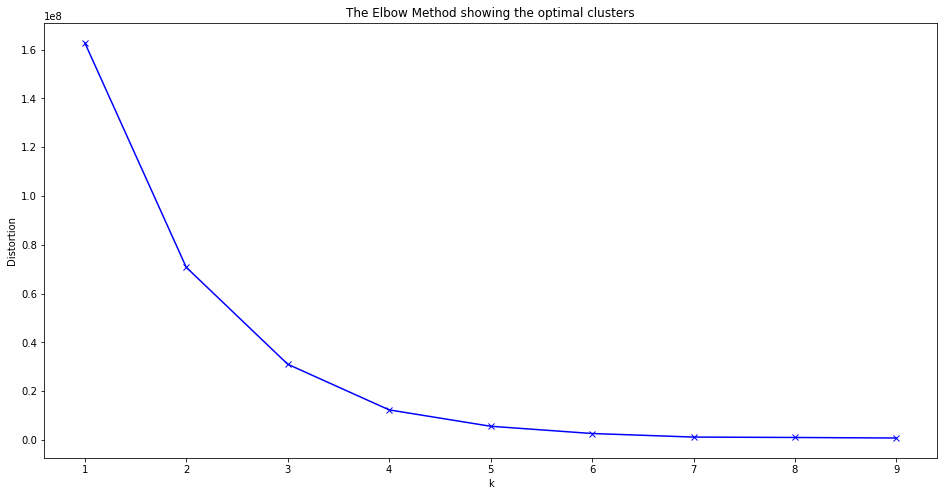

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
%matplotlib inline

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df1)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

Now, the K-means model will predict the dataframe values and fitted them into 4 clusters and assign them to a new column named cluster. 

In [21]:
kmeans_model = KMeans(n_clusters=4, n_jobs=4, random_state=32932)
kmeans_predict = kmeans_model.fit_predict(df1)

In [22]:
df1['cluster'] = kmeans_predict
df1.head()

,userID,companySize,visitPeriodMode,taskGoalInNumber,weekOfYear,mostVisitedPageCount,visitPerDayMode,cluster
98955,178,1989,2,2,49,2,2,0
99143,112,2419,2,5,50,5,5,0
99196,74,2446,2,3,45,3,3,0
99272,153,1475,2,2,46,5,5,2
99296,157,2451,2,6,39,1,1,0


The below cell calculates the magnitude of each persona both in number and in percentage.

In [23]:
df2 = df1.drop_duplicates(subset=['userID'])
cardinality_df = pd.DataFrame(df2['cluster'].value_counts().reset_index())
cardinality_df.rename(columns={
    'index': 'Persona',
    'cluster': 'Magnitude'
}, inplace=True)
cardinality_df['MagnitudeInPercentage'] = cardinality_df['Magnitude'] /cardinality_df['Magnitude'].sum() * 100
cardinality_df['MagnitudeInPercentage'] = np.ceil(cardinality_df['MagnitudeInPercentage'])
cardinality_df

,Persona,Magnitude,MagnitudeInPercentage
0,0,115,58.0
1,2,44,22.0
2,3,32,16.0
3,1,10,5.0


The below cell replaces the numeric values back to the original categorical values and take the top 3 values to be presented in the dashboard. The process repeated for each persona.

In [25]:
n = 3

persona1 = df1.copy()
persona1 = persona1[persona1['cluster'] == 0]
persona1['visitPeriodMode'].replace({
    0: 'Night',
    1: 'Late night',
    2: 'Early morning',
    3: 'Morning',
    4: 'Afternoon',
    5: 'Late afternoon',
    6: 'Evening',
    7: 'Late evening',
}, inplace=True)
persona1_visitPeriodMode = persona1['visitPeriodMode'].value_counts()[:n].index.tolist()

persona1['taskGoalInNumber'].replace({
    0: 'No activity detected',
    1: 'https://en.wikipedia.org',
    2: 'https://en.wikipedia.org/wiki/Financial_services',
    3: 'https://en.wikipedia.org/wiki/Main_Page',
    4: 'https://en.wikipedia.org/wiki/Accounting',
    5: 'https://en.wikipedia.org/wiki/Bookkeeping',
    6: 'https://en.wikipedia.org/wiki/Financial_technology'
}, inplace=True)
persona1_taskGoalInNumber = persona1['taskGoalInNumber'].value_counts()[:n].index.tolist()

persona1['weekOfYear'] = persona1['weekOfYear'].astype(int)
persona1['weekOfYear'].replace({
    39: 1,
    40: 2,
    41: 3,
    42: 4,
    43: 5,
    44: 6,
    45: 7,
    46: 8,
    47: 9,
    48: 10,
    49: 11,
    50: 12,
    51: 13,
    52: 14
}, inplace=True)
persona1_weekOfYear = persona1['weekOfYear'].value_counts()[:n].index.tolist()

persona1_companySize = persona1['companySize'].value_counts()[:n].index.tolist()
persona1_visitPerDayMode = persona1['visitPerDayMode'].value_counts()[:n].index.tolist()

persona1_magnitude = cardinality_df[cardinality_df['Persona'] == 0]
persona1_magnitude = persona1_magnitude['Magnitude'].tolist()

persona1_magnitudeInPercentage = cardinality_df[cardinality_df['Persona'] == 0]
persona1_magnitudeInPercentage = persona1_magnitudeInPercentage['MagnitudeInPercentage'].tolist()

In [26]:
n = 3

persona2 = df1.copy()
persona2 = persona2[persona2['cluster'] == 1]
persona2['visitPeriodMode'].replace({
    0: 'Night',
    1: 'Late night',
    2: 'Early morning',
    3: 'Morning',
    4: 'Afternoon',
    5: 'Late afternoon',
    6: 'Evening',
    7: 'Late evening',
}, inplace=True)
persona2_visitPeriodMode = persona2['visitPeriodMode'].value_counts()[:n].index.tolist()

persona2['taskGoalInNumber'].replace({
    0: 'No activity detected',
    1: 'https://en.wikipedia.org',
    2: 'https://en.wikipedia.org/wiki/Financial_services',
    3: 'https://en.wikipedia.org/wiki/Main_Page',
    4: 'https://en.wikipedia.org/wiki/Accounting',
    5: 'https://en.wikipedia.org/wiki/Bookkeeping',
    6: 'https://en.wikipedia.org/wiki/Financial_technology'
}, inplace=True)
persona2_taskGoalInNumber = persona2['taskGoalInNumber'].value_counts()[:n].index.tolist()

persona2['weekOfYear'] = persona2['weekOfYear'].astype(int)
persona2['weekOfYear'].replace({
    39: 1,
    40: 2,
    41: 3,
    42: 4,
    43: 5,
    44: 6,
    45: 7,
    46: 8,
    47: 9,
    48: 10,
    49: 11,
    50: 12,
    51: 13,
    52: 14
}, inplace=True)
persona2_weekOfYear = persona2['weekOfYear'].value_counts()[:n].index.tolist()

persona2_companySize = persona2['companySize'].value_counts()[:n].index.tolist()
persona2_visitPerDayMode = persona2['visitPerDayMode'].value_counts()[:n].index.tolist()

persona2_magnitude = cardinality_df[cardinality_df['Persona'] == 1]
persona2_magnitude = persona2_magnitude['Magnitude'].tolist()

persona2_magnitudeInPercentage = cardinality_df[cardinality_df['Persona'] == 1]
persona2_magnitudeInPercentage = persona2_magnitudeInPercentage['MagnitudeInPercentage'].tolist()

In [27]:
n = 3

persona3 = df1.copy()
persona3 = persona3[persona3['cluster'] == 2]
persona3['visitPeriodMode'].replace({
    0: 'Night',
    1: 'Late night',
    2: 'Early morning',
    3: 'Morning',
    4: 'Afternoon',
    5: 'Late afternoon',
    6: 'Evening',
    7: 'Late evening',
}, inplace=True)
persona3_visitPeriodMode = persona3['visitPeriodMode'].value_counts()[:n].index.tolist()

persona3['taskGoalInNumber'].replace({
    0: 'No activity detected',
    1: 'https://en.wikipedia.org',
    2: 'https://en.wikipedia.org/wiki/Financial_services',
    3: 'https://en.wikipedia.org/wiki/Main_Page',
    4: 'https://en.wikipedia.org/wiki/Accounting',
    5: 'https://en.wikipedia.org/wiki/Bookkeeping',
    6: 'https://en.wikipedia.org/wiki/Financial_technology'
}, inplace=True)
persona3_taskGoalInNumber = persona3['taskGoalInNumber'].value_counts()[:n].index.tolist()

persona3['weekOfYear'] = persona3['weekOfYear'].astype(int)
persona3['weekOfYear'].replace({
    39: 1,
    40: 2,
    41: 3,
    42: 4,
    43: 5,
    44: 6,
    45: 7,
    46: 8,
    47: 9,
    48: 10,
    49: 11,
    50: 12,
    51: 13,
    52: 14
}, inplace=True)
persona3_weekOfYear = persona3['weekOfYear'].value_counts()[:n].index.tolist()

persona3_companySize = persona3['companySize'].value_counts()[:n].index.tolist()
persona3_visitPerDayMode = persona3['visitPerDayMode'].value_counts()[:n].index.tolist()

persona3_magnitude = cardinality_df[cardinality_df['Persona'] == 2]
persona3_magnitude = persona3_magnitude['Magnitude'].tolist()

persona3_magnitudeInPercentage = cardinality_df[cardinality_df['Persona'] == 2]
persona3_magnitudeInPercentage = persona3_magnitudeInPercentage['MagnitudeInPercentage'].tolist()

In [28]:
n = 3

persona4 = df1.copy()
persona4 = persona4[persona4['cluster'] == 3]
persona4['visitPeriodMode'].replace({
    0: 'Night',
    1: 'Late night',
    2: 'Early morning',
    3: 'Morning',
    4: 'Afternoon',
    5: 'Late afternoon',
    6: 'Evening',
    7: 'Late evening',
}, inplace=True)
persona4_visitPeriodMode = persona4['visitPeriodMode'].value_counts()[:n].index.tolist()

persona4['taskGoalInNumber'].replace({
    0: 'No activity detected',
    1: 'https://en.wikipedia.org',
    2: 'https://en.wikipedia.org/wiki/Financial_services',
    3: 'https://en.wikipedia.org/wiki/Main_Page',
    4: 'https://en.wikipedia.org/wiki/Accounting',
    5: 'https://en.wikipedia.org/wiki/Bookkeeping',
    6: 'https://en.wikipedia.org/wiki/Financial_technology'
}, inplace=True)
persona4_taskGoalInNumber = persona4['taskGoalInNumber'].value_counts()[:n].index.tolist()

persona4['weekOfYear'] = persona4['weekOfYear'].astype(int)
persona4['weekOfYear'].replace({
    39: 1,
    40: 2,
    41: 3,
    42: 4,
    43: 5,
    44: 6,
    45: 7,
    46: 8,
    47: 9,
    48: 10,
    49: 11,
    50: 12,
    51: 13,
    52: 14
}, inplace=True)
persona4_weekOfYear = persona4['weekOfYear'].value_counts()[:n].index.tolist()

persona4_companySize = persona4['companySize'].value_counts()[:n].index.tolist()
persona4_visitPerDayMode = persona4['visitPerDayMode'].value_counts()[:n].index.tolist()

persona4_magnitude = cardinality_df[cardinality_df['Persona'] == 3]
persona4_magnitude = persona4_magnitude['Magnitude'].tolist()

persona4_magnitudeInPercentage = cardinality_df[cardinality_df['Persona'] == 3]
persona4_magnitudeInPercentage = persona4_magnitudeInPercentage['MagnitudeInPercentage'].tolist()

Finally, all of the processed data are ready to be injected into more readable senteces before added (manually) to the dashboard (design).

In [29]:
# Personas
print('The personas were created from ', activityCount, ' amount of user activity rows in Q4 2020, created by ', userCount, ' amount of users.')
print('The variables taken from the database are ', variableNames)
print('The following variables were added through data transformation: ', variableTransformedNames)
print('-------------------------------------------------------------------------------------------------------')
print('Persona 1 consists of ', persona1_magnitude, 'users or ', persona1_magnitudeInPercentage, '% of allMyFinance users.')
print('')
print('It consists of users wich company have ', persona1_companySize, ' employees.')
print('')
print('This persona visits MyFinance platform mostly in ', persona1_visitPeriodMode, ' to do tasks in ', persona1_taskGoalInNumber, '.')
print('')
print('Mostly using MyFinance on the ', persona1_weekOfYear, ' week of the quarter, this persona commonly visit MyFInance ', persona1_visitPerDayMode, ' times per day.')
print('-------------------------------------------------------------------------------------------------------')
print('Persona 2 consists of ', persona2_magnitude, 'users or ', persona2_magnitudeInPercentage, '% of allMyFinance users.')
print('')
print('It consists of users wich company have ', persona2_companySize, ' employees.')
print('')
print('This persona visits MyFinance platform mostly in ', persona2_visitPeriodMode, ' to do tasks in ', persona2_taskGoalInNumber, '.')
print('')
print('Mostly using MyFinance on the ', persona2_weekOfYear, ' week of the quarter, this persona commonly visit MyFInance ', persona2_visitPerDayMode, ' times per day.')
print('-------------------------------------------------------------------------------------------------------')
print('Persona 3 consists of ', persona3_magnitude, 'users or ', persona3_magnitudeInPercentage, '% of allMyFinance users.')
print('')
print('It consists of users wich company have ', persona3_companySize, ' employees.')
print('')
print('This persona visits MyFinance platform mostly in ', persona3_visitPeriodMode, ' to do tasks in ', persona3_taskGoalInNumber, '.')
print('')
print('Mostly using MyFinance on the ', persona3_weekOfYear, ' week of the quarter, this persona commonly visit MyFInance ', persona3_visitPerDayMode, ' times per day.')
print('-------------------------------------------------------------------------------------------------------')
print('Persona 4 consists of ', persona4_magnitude, 'users or ', persona4_magnitudeInPercentage, '% of allMyFinance users.')
print('')
print('It consists of users wich company have ', persona4_companySize, ' employees.')
print('')
print('This persona visits MyFinance platform mostly in ', persona4_visitPeriodMode, ' to do tasks in ', persona4_taskGoalInNumber, '.')
print('')
print('Mostly using MyFinance on the ', persona4_weekOfYear, ' week of the quarter, this persona commonly visit MyFInance ', persona4_visitPerDayMode, ' times per day.')
print('-------------------------------------------------------------------------------------------------------')

The personas were created from  100000  amount of user activity rows in Q4 2020, created by  201  amount of users.
The variables taken from the database are  ['Unnamed: 0', 'userID', 'companyID', 'country', 'timestamp', 'year', 'quarter', 'month', 'weekNumber', 'dayNumber', 'activity', 'page']
The following variables were added through data transformation:  ['userID', 'companySize', 'visitPeriodMode', 'taskGoalInNumber', 'weekOfYear', 'mostVisitedPageCount', 'visitPerDayMode']
-------------------------------------------------------------------------------------------------------
Persona 1 consists of  [115] users or  [58.0] % of allMyFinance users.

It consists of users wich company have  [2424, 2419, 2446]  employees.

This persona visits MyFinance platform mostly in  ['Early morning']  to do tasks in  ['https://en.wikipedia.org/wiki/Financial_services', 'https://en.wikipedia.org/wiki/Financial_technology', 'https://en.wikipedia.org/wiki/Bookkeeping'] .

Mostly using MyFinance on the 